In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("Cardiovascular_Disease_Dataset.csv")
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [2]:
df.isna().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

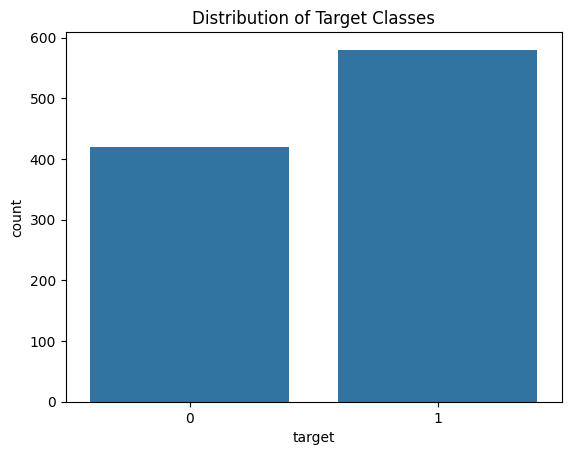

In [3]:
# Distribution of the target variable
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Classes')
plt.show()


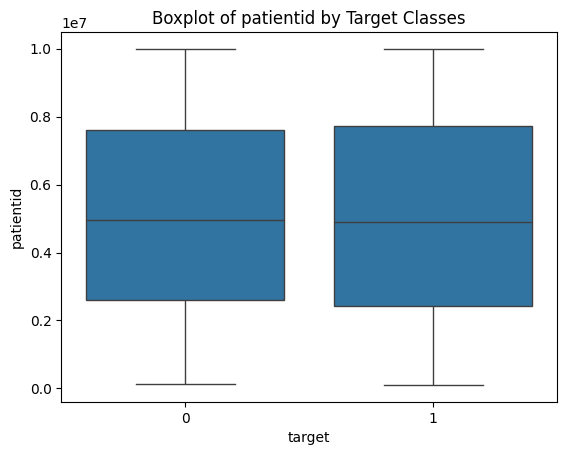

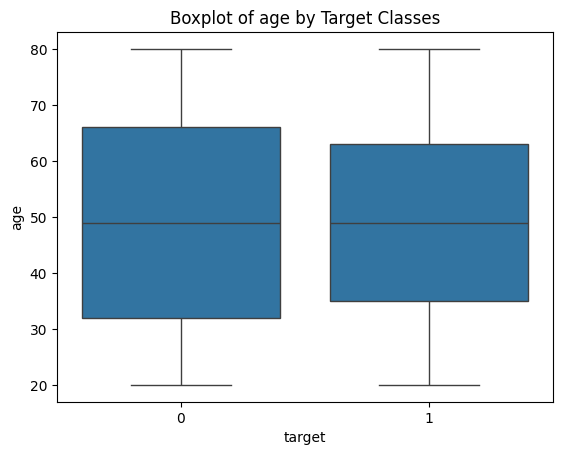

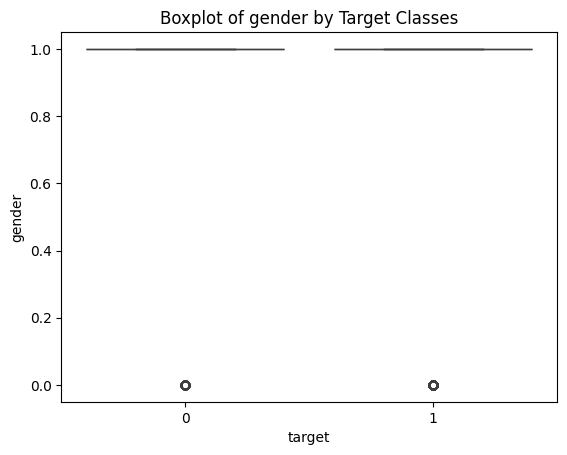

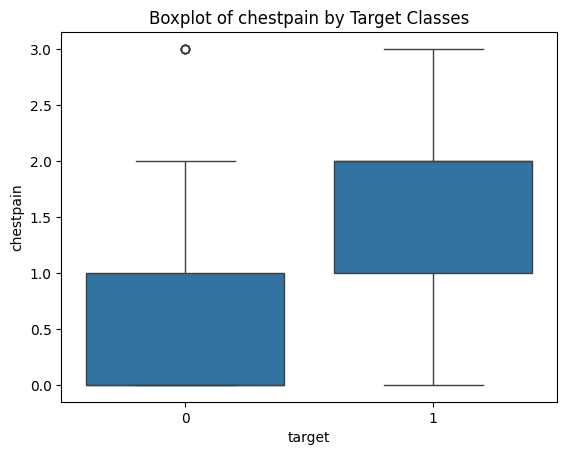

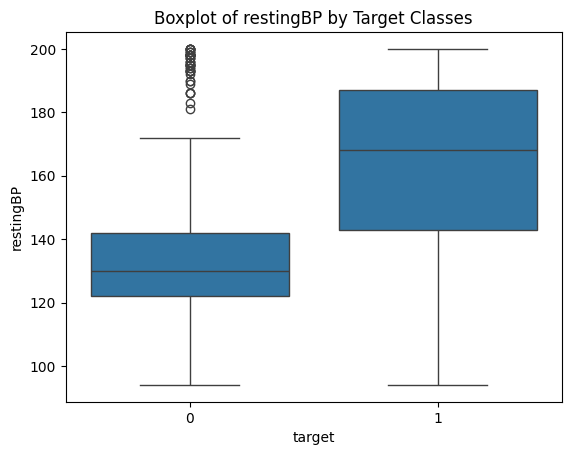

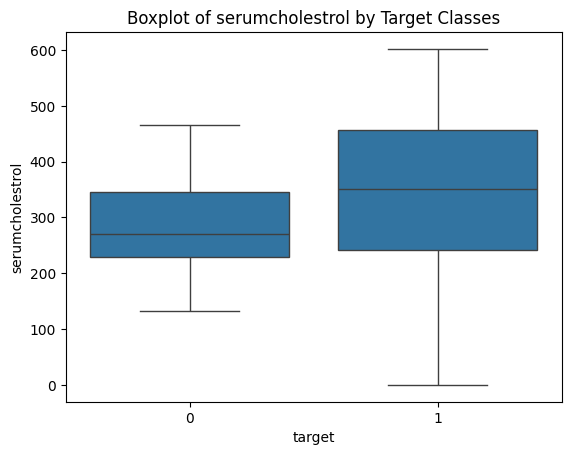

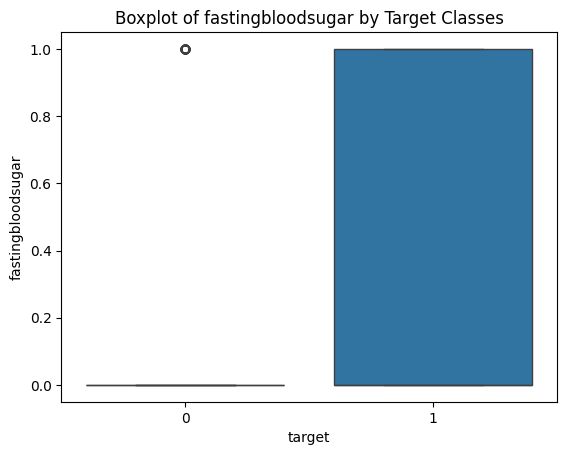

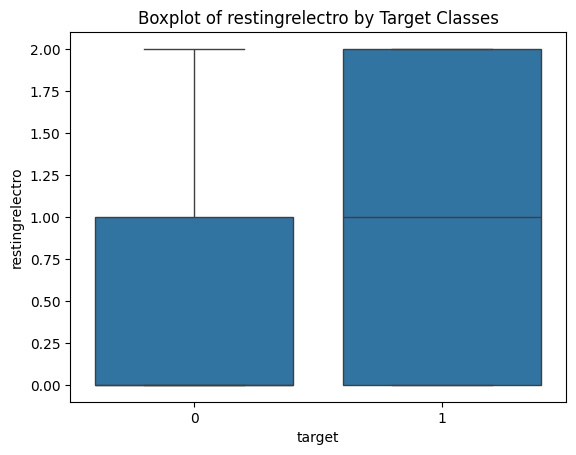

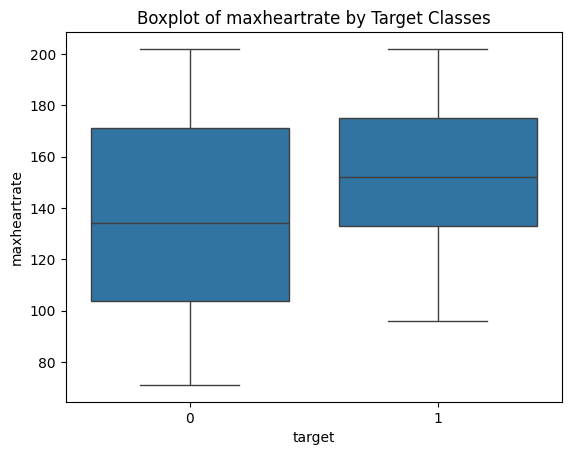

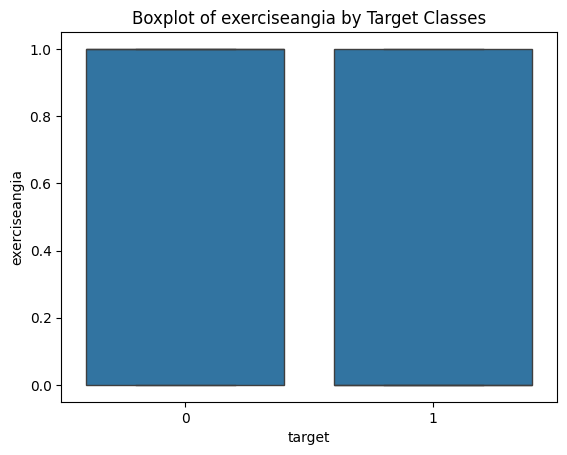

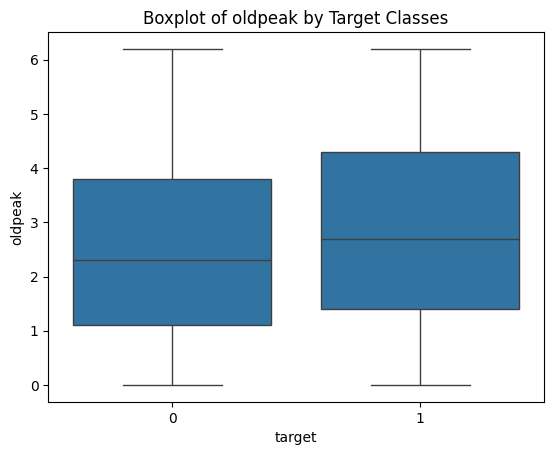

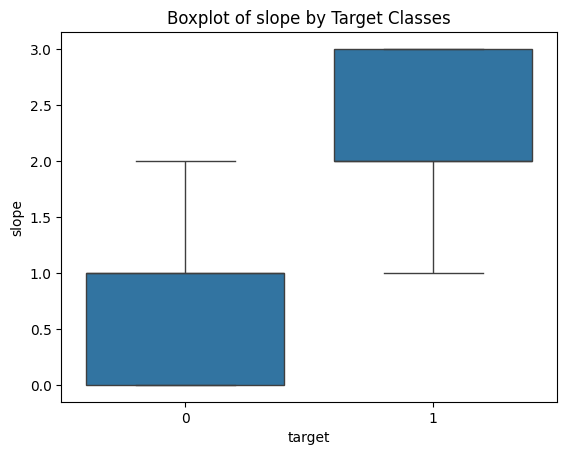

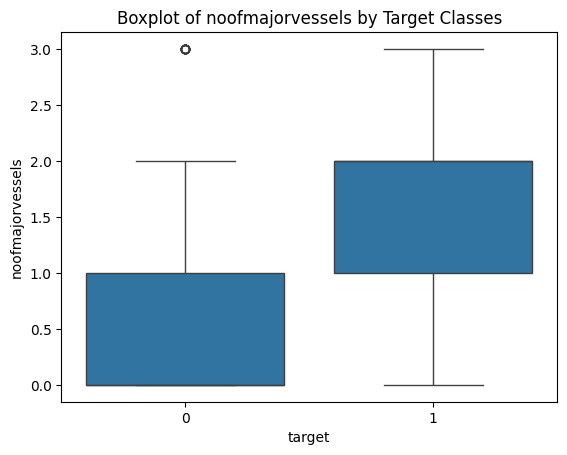

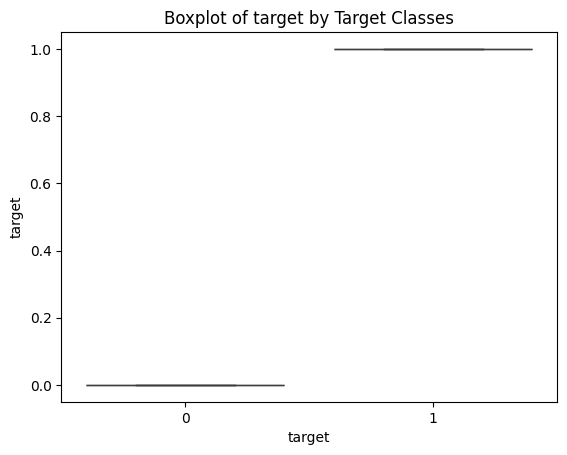

In [4]:

# Boxplots for each numeric feature split by the 'target'
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_features:
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f'Boxplot of {col} by Target Classes')
    plt.show()

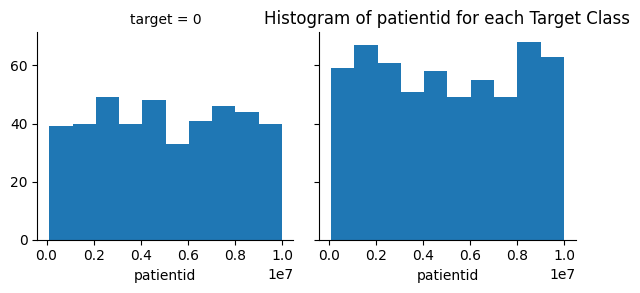

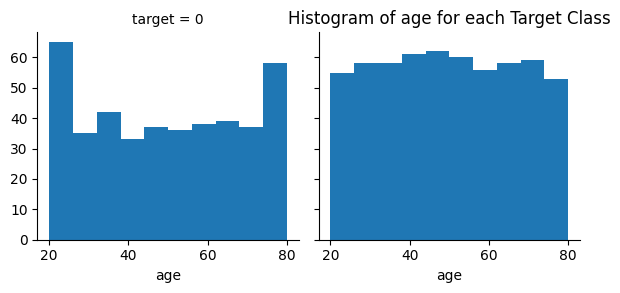

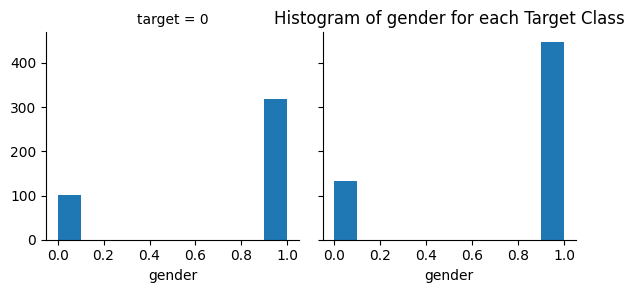

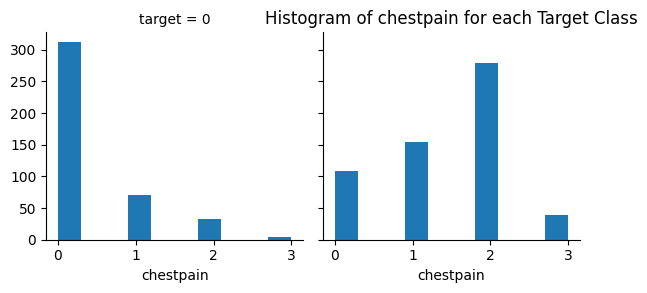

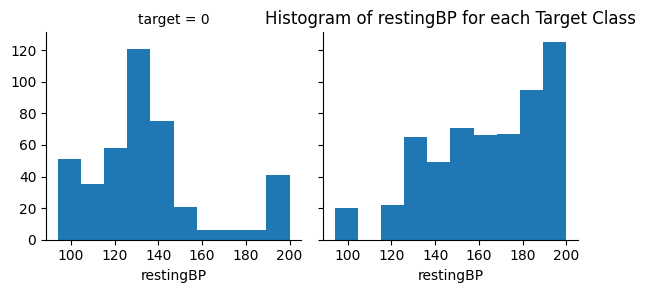

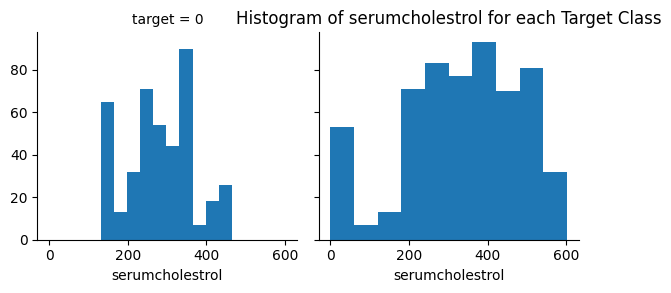

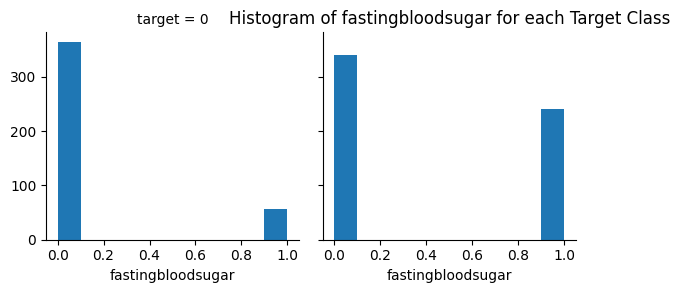

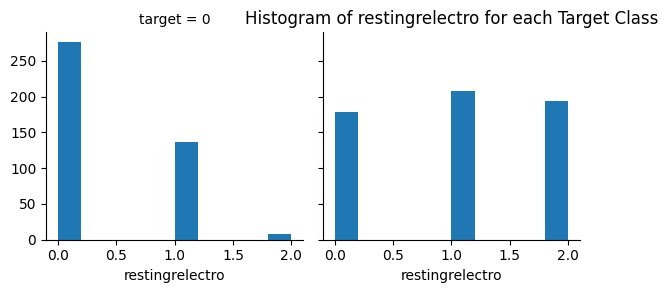

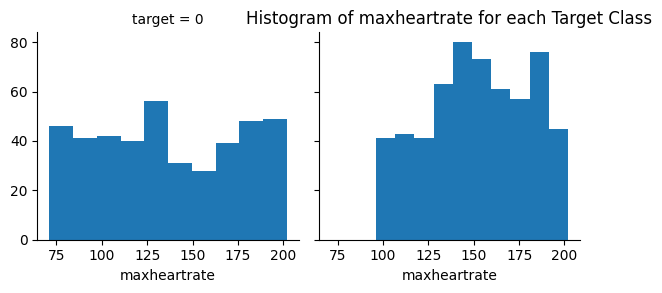

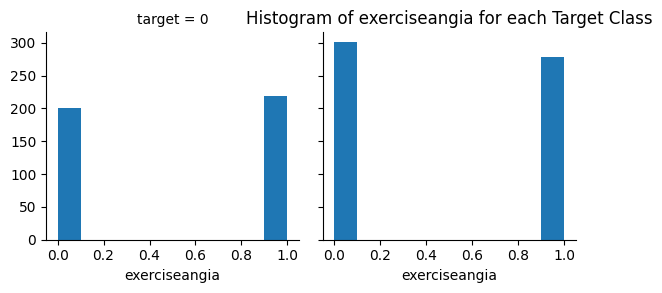

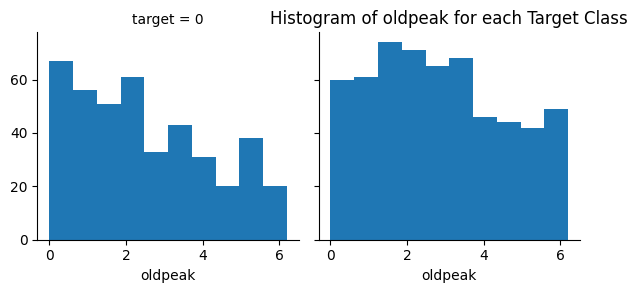

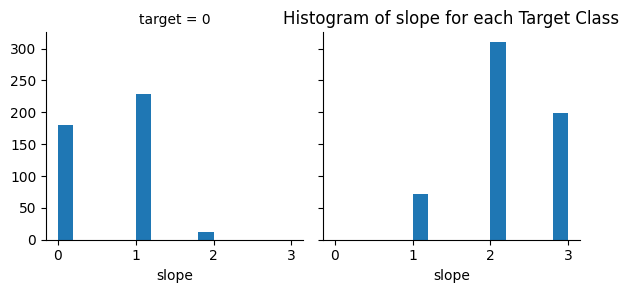

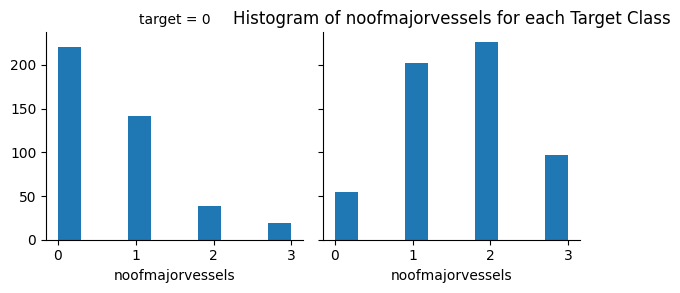

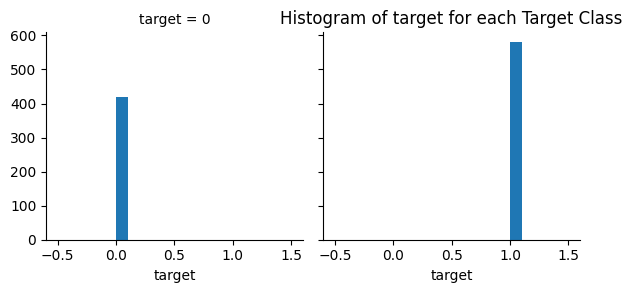

In [5]:
# Histograms for each numeric feature
for col in numeric_features:
    g = sns.FacetGrid(df, col='target')
    g.map(plt.hist, col)
    plt.title(f'Histogram of {col} for each Target Class')
    plt.show()


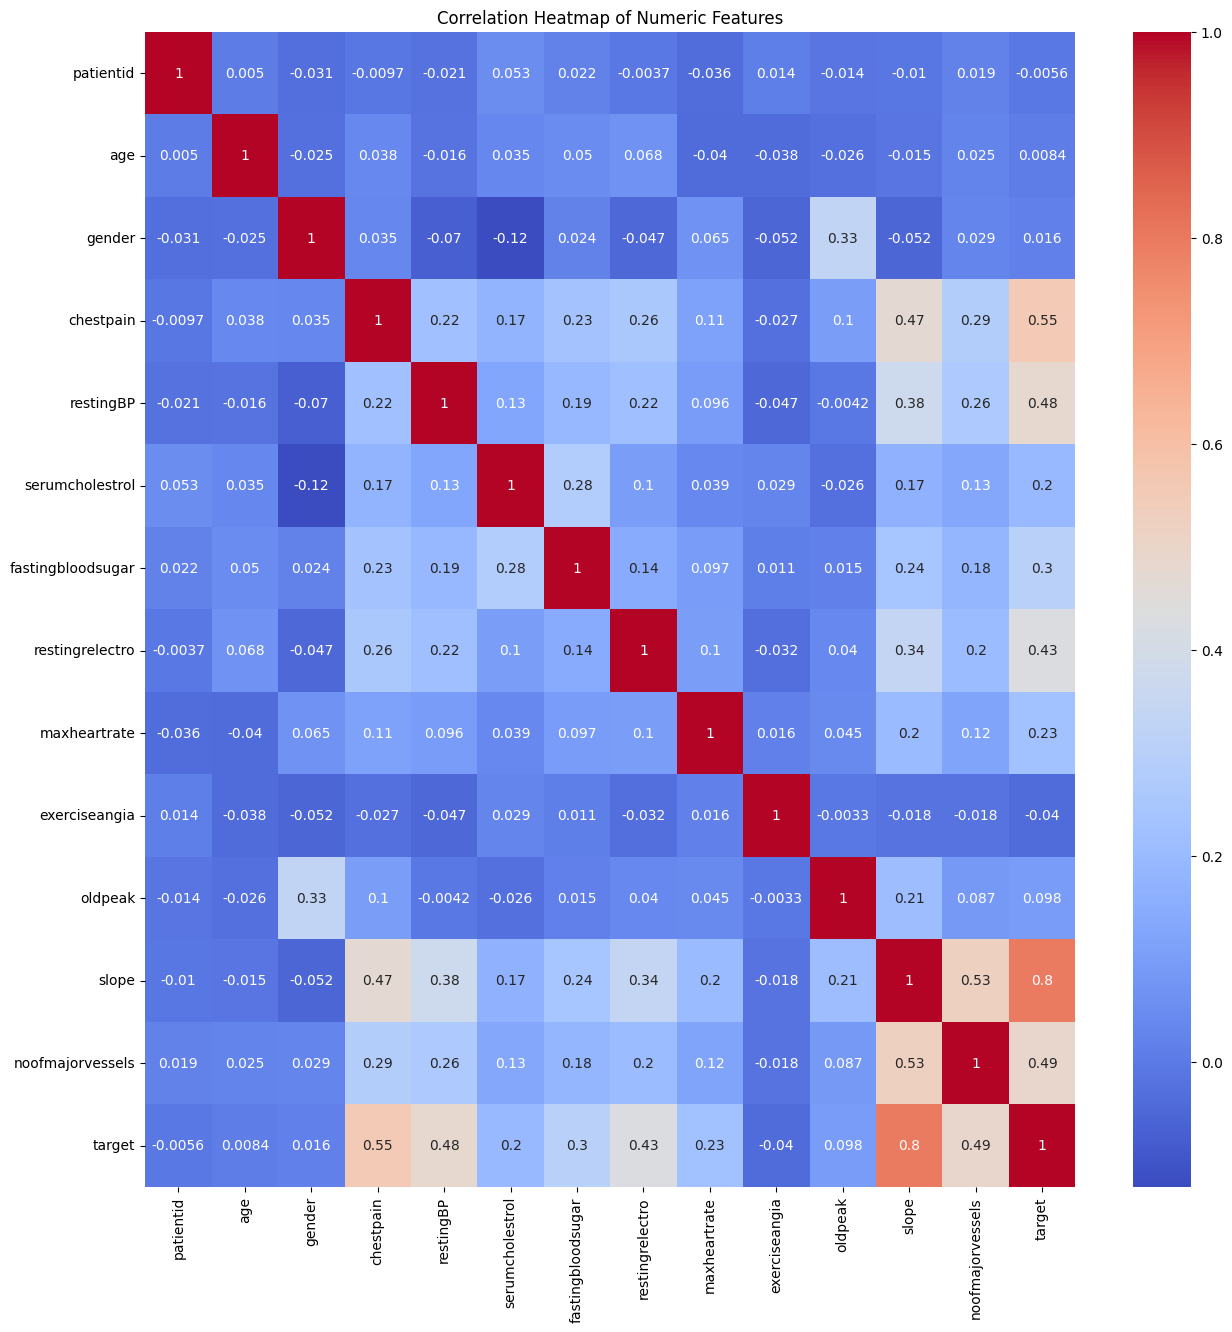

In [12]:

# Correlation heatmap
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


In [13]:
corr

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
patientid,1.000000,0.004978,-0.031263,-0.009679,-0.020926,0.053464,0.022331,-0.003667,-0.036486,0.014338,-0.013825,-0.010128,0.019465,-0.005637
age,0.004978,1.000000,-0.024717,0.037731,-0.016126,0.035439,0.049732,0.067736,-0.040092,-0.037581,-0.026020,-0.015334,0.025407,0.008356
gender,-0.031263,-0.024717,1.000000,0.035402,-0.069727,-0.120759,0.023560,-0.046634,0.064606,-0.051746,0.331457,-0.051957,0.029376,0.015769
chestpain,-0.009679,0.037731,0.035402,1.000000,0.222267,0.174731,0.232059,0.256316,0.114496,-0.027376,0.101345,0.472731,0.285156,0.554228
restingBP,-0.020926,-0.016126,-0.069727,0.222267,1.000000,0.126523,0.192063,0.219887,0.095569,-0.046545,-0.004225,0.376711,0.263194,0.482387
serumcholestrol,0.053464,0.035439,-0.120759,0.174731,0.126523,1.000000,0.278337,0.101767,0.038967,0.029422,-0.025910,0.165569,0.132419,0.195340
fastingbloodsugar,0.022331,0.049732,0.023560,0.232059,0.192063,0.278337,1.000000,0.143982,0.096528,0.011356,0.015311,0.242734,0.182246,0.303233
restingrelectro,-0.003667,0.067736,-0.046634,0.256316,0.219887,0.101767,0.143982,1.000000,0.099991,-0.032489,0.040291,0.343280,0.204684,0.426837
maxheartrate,-0.036486,-0.040092,0.064606,0.114496,0.095569,0.038967,0.096528,0.099991,1.000000,0.015536,0.044614,0.201515,0.122763,0.228343
exerciseangia,0.014338,-0.037581,-0.051746,-0.027376,-0.046545,0.029422,0.011356,-0.032489,0.015536,1.000000,-0.003296,-0.017783,-0.017513,-0.039874


In [16]:
selected_cols=["chestpain","restingBP","serumcholestrol","fastingbloodsugar","restingrelectro","maxheartrate","exerciseangia","oldpeak","slope","noofmajorvessels","target"]

In [18]:
df=df[selected_cols]
df.head()

,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,2,171,0,0,1,147,0,5.3,3,3,1
1,0,94,229,0,1,115,0,3.7,1,1,0
2,2,133,142,0,0,202,1,5.0,1,0,0
3,0,138,295,1,1,153,0,3.2,2,2,1
4,1,199,0,0,2,136,0,5.3,3,2,1


In [26]:


# Data Standardization
scaler = StandardScaler()
X = df.drop(["target"], axis=1)  # drop 'patientid' as it's an identifier
y = df["target"]
X_scaled = scaler.fit_transform(X)

# Model Building and Evaluation
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Define the models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True),
    "Neural Network": MLPClassifier(max_iter=1000)
}

# Train and evaluate models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Print the metrics
    print(f"{name}\nAccuracy: {accuracy} \nPrecision: {precision} \nRecall: {recall} \nF1: {f1} \nROC AUC: {roc_auc}\n")

# Cross-Validation with Logistic Regression
logreg = models["Logistic Regression"]
cross_val_scores = cross_val_score(logreg, X_scaled, y, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
print("Logistic Regression - Cross-validated Accuracy: ", np.mean(cross_val_scores))

# Cross-Validation with SVM
SVM_m = models["SVM"]
cross_val_scores = cross_val_score(SVM_m, X_scaled, y, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
print("SVM - Cross-validated Accuracy: ", np.mean(cross_val_scores))


# Cross-Validation with Logistic Regression
mlp = models["Neural Network"]
cross_val_scores = cross_val_score(mlp, X_scaled, y, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
print("Neural Network - MLP - Cross-validated Accuracy: ", np.mean(cross_val_scores))



Logistic Regression
Accuracy: 0.965 
Precision: 0.9537037037037037 
Recall: 0.9809523809523809 
F1: 0.9671361502347416 
ROC AUC: 0.9892731829573934

SVM
Accuracy: 0.97 
Precision: 0.9541284403669725 
Recall: 0.9904761904761905 
F1: 0.9719626168224299 
ROC AUC: 0.9864661654135338

Neural Network
Accuracy: 0.97 
Precision: 0.9626168224299065 
Recall: 0.9809523809523809 
F1: 0.9716981132075471 
ROC AUC: 0.9917794486215539

Logistic Regression - Cross-validated Accuracy:  0.9540000000000001
SVM - Cross-validated Accuracy:  0.9640000000000001
Neural Network - MLP - Cross-validated Accuracy:  0.9570000000000001
